In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

import pickle, os


In [2]:
import holoviews as hv
hv.notebook_extension()

In [3]:
# SUPER SLOOOOOW ~ 10-20 minutes to load
# BES_data_folder = "../BES_analysis_data/"
# BES_code_folder = "../BES_analysis_code/"
# BES_Panel = pd.read_stata(BES_data_folder+"BES2015_W10_Panel_v0.3.dta") # 

In [4]:
BES_Panel= pd.read_pickle("BES_gEV_wave_weights.pkl")

b":HoloMap   [wave]\n   :ItemTable   (Green Party,Conservative,Don't know,Labour,British National Party (BNP),Plaid Cymru,United Kingdom Independence Party (UKIP),Liberal Democrat,Scottish National Party (SNP),Other,I would not vote)"
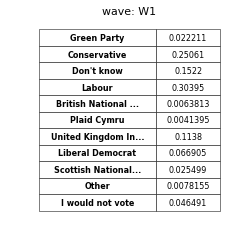
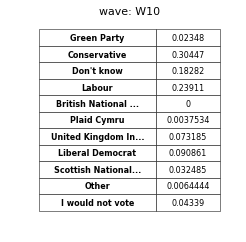
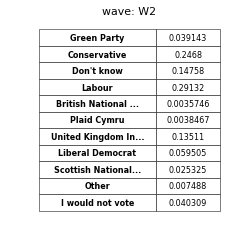
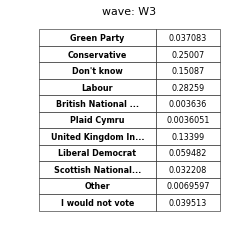
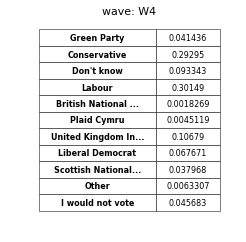
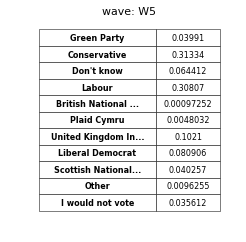
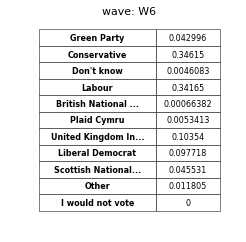
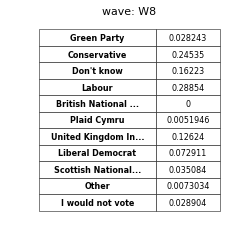

In [5]:
tables = hv.HoloMap(kdims=['wave'])
for wave in ["W1","W2","W3","W4","W5","W6","W8","W10"]:

    vdims = BES_Panel["generalElectionVote"+ wave].cat.categories
    crosstab = pd.crosstab(index   = BES_Panel["generalElectionVote"+wave],
                     columns = BES_Panel["wave" + wave.replace("W","")],
                     values  = BES_Panel["wt_full_"+wave],
                     aggfunc = sum,
                     normalize=True)    

    tables[wave] = hv.ItemTable( zip( vdims, tuple(crosstab[1.0][vdims].values) ) )
    
tables

In [6]:
# get full list of *all* generalElectionVote options
cats = []
for wave in ["W1","W2","W3","W4","W5","W6","W8","W10"]:

    cats.extend(list(BES_Panel["generalElectionVote"+ wave].cat.categories))
    
all_generalElectionVote_options = list(set(cats))

:Layout
   .HoloMap.I  :HoloMap   [wave]
      :Table   [generalElectionVote]   (frequency)
   .HoloMap.II :HoloMap   [wave]
      :Bars   [generalElectionVote]   (frequency)
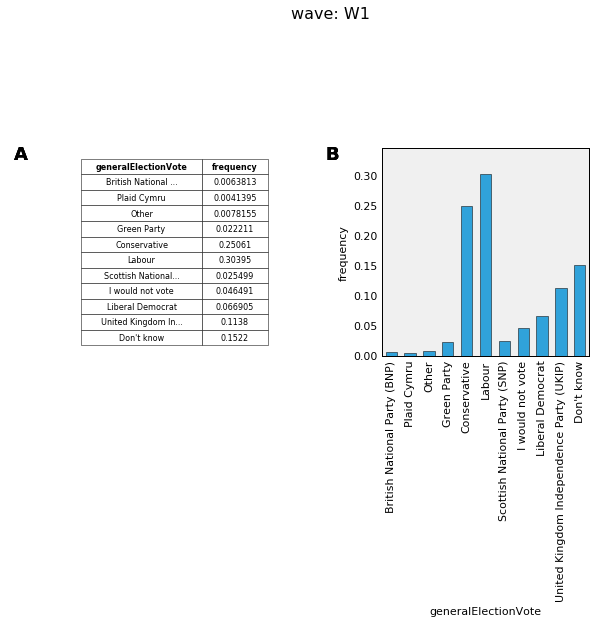
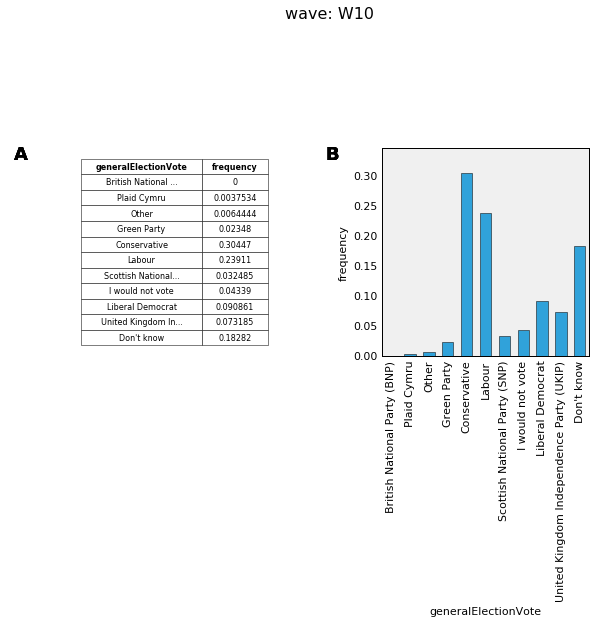
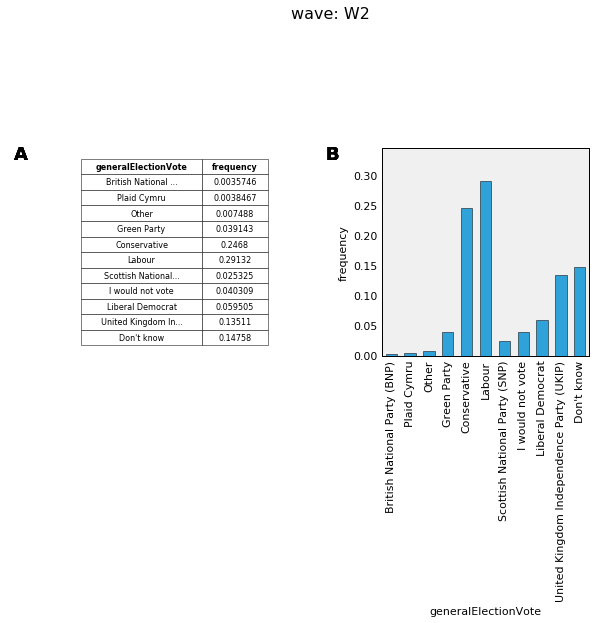
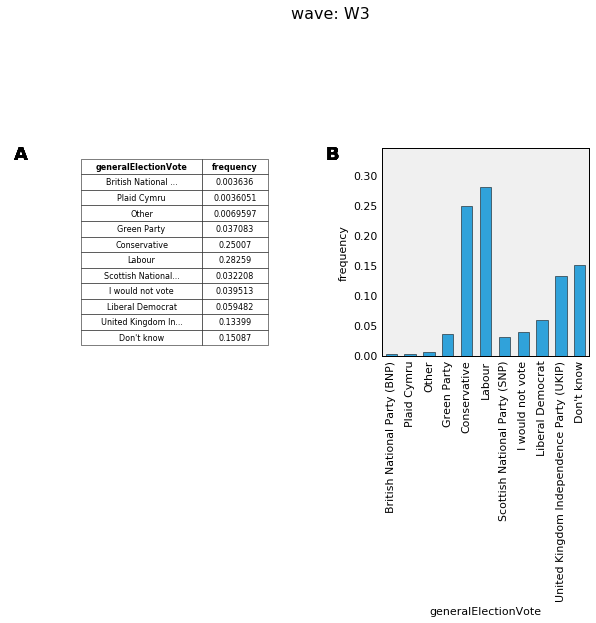
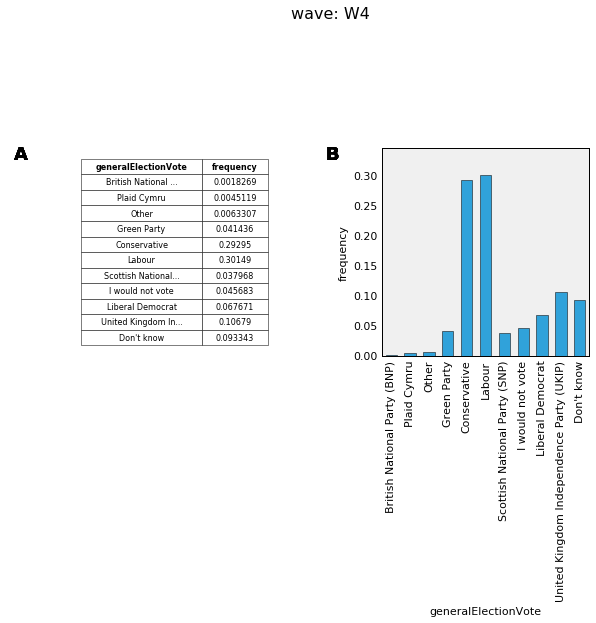
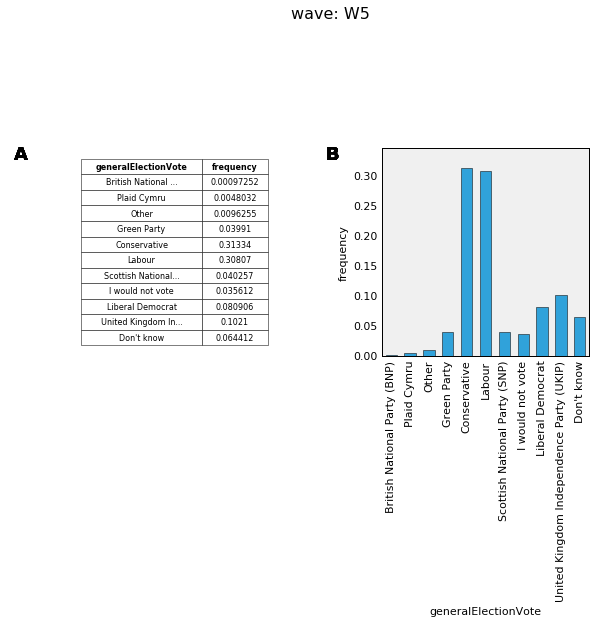
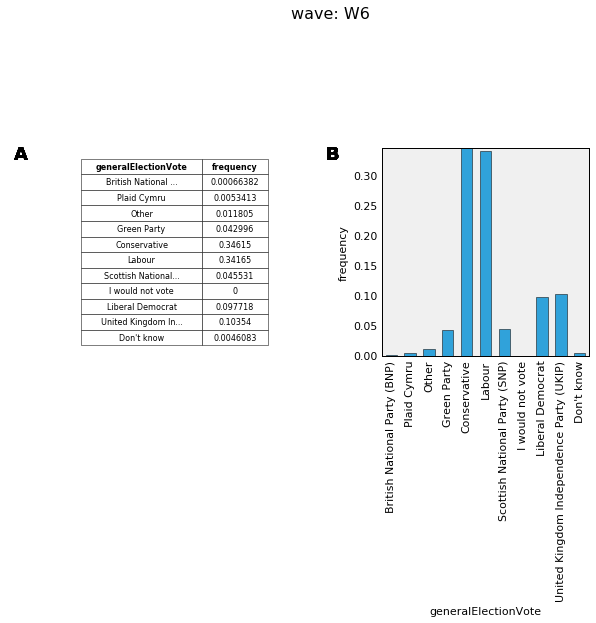
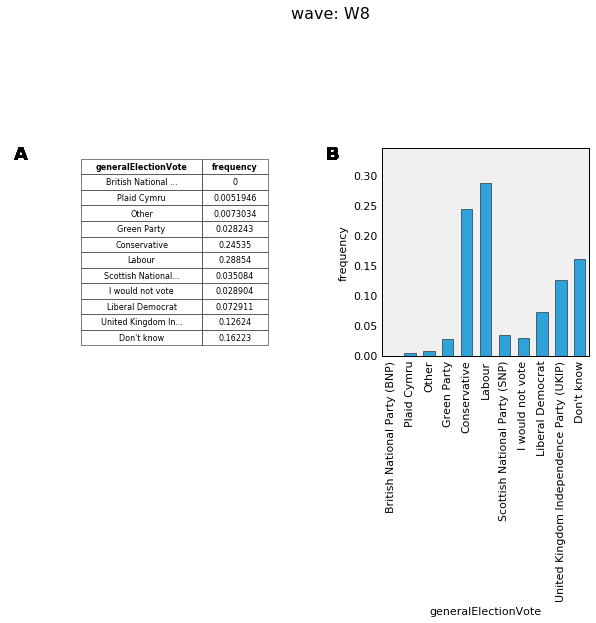

In [7]:
tables = hv.HoloMap(kdims=['wave'])
bars   = hv.HoloMap(kdims=['wave'])

vote_dim = hv.Dimension("generalElectionVote",values = all_generalElectionVote_options)
for wave in ["W1","W2","W3","W4","W5","W6","W8","W10"]:

    # make sure every generalElectionVote has the same set of categories
    # or holoviews will crash with a *really* unhelpful error message
    BES_Panel["generalElectionVote"+wave].cat.set_categories(all_generalElectionVote_options, inplace=True)

    crosstab = pd.crosstab(index   = BES_Panel["generalElectionVote"+wave],
                     columns = BES_Panel["wave" + wave.replace("W","")],
                     values  = BES_Panel["wt_full_"+wave],
                     aggfunc = sum,
                     normalize=True)
    
    ct = pd.DataFrame([crosstab.index,crosstab[1.0]]).T
    ct.columns=["generalElectionVote","frequency"]
    
    tables[wave] = hv.Table( ct, kdims=[vote_dim], vdims =["frequency"] )
    bars[wave]   = hv.Bars(  ct, kdims=[vote_dim], vdims =["frequency"] )   

# rotate labels so they don't overlap
%opts Bars [xrotation=90]

tables + bars

In [8]:
# for development, lets pare down the BES_Panel dataset to just the columns we're working with now
cols = []
for wave in ["W1","W2","W3","W4","W5","W6","W8","W10"]:
    cols.append( "generalElectionVote"+wave )
    cols.append( "wave" + wave.replace("W","") )
    cols.append( "wt_full_"+wave )
    
BES_Panel[cols].to_pickle("BES_gEV_wave_weights.pkl")

# read back in later with this
# BES_Panel= pd.read_pickle("BES_gEV_wave_weights.pkl")

In [9]:
BES_Panel.dtypes

generalElectionVoteW1     category
wave1                      float64
wt_full_W1                 float64
generalElectionVoteW2     category
wave2                      float64
wt_full_W2                 float64
generalElectionVoteW3     category
wave3                      float64
wt_full_W3                 float64
generalElectionVoteW4     category
wave4                      float64
wt_full_W4                 float64
generalElectionVoteW5     category
wave5                      float64
wt_full_W5                 float64
generalElectionVoteW6     category
wave6                      float64
wt_full_W6                 float64
generalElectionVoteW8     category
wave8                      float64
wt_full_W8                 float64
generalElectionVoteW10    category
wave10                     float64
wt_full_W10                float64
dtype: object

In [10]:
# how to get the list of categories for a category dtype (order matters here for indexing!)
BES_Panel.generalElectionVoteW1.cat.categories

Index(['British National Party (BNP)', 'Plaid Cymru', 'Other', 'Green Party',
       'Conservative', 'Labour', 'Scottish National Party (SNP)',
       'I would not vote', 'Liberal Democrat',
       'United Kingdom Independence Party (UKIP)', 'Don't know'],
      dtype='object')

In [11]:
# how to turn category dtype into integer (index to the category list above) type
BES_Panel.generalElectionVoteW1.cat.codes

0         5
1         4
2         5
3         4
4         4
5         5
6         9
7         9
8         5
9         4
10        4
11        9
12        4
13        4
14       -1
15        3
16        4
17        6
18        5
19        9
20        4
21        8
22        9
23       10
24        9
25        7
26        9
27        8
28        9
29        4
         ..
64659    -1
64660    -1
64661    -1
64662    -1
64663    -1
64664    -1
64665    -1
64666    -1
64667    -1
64668    -1
64669    -1
64670    -1
64671    -1
64672    -1
64673    -1
64674    -1
64675    -1
64676    -1
64677    -1
64678    -1
64679    -1
64680    -1
64681    -1
64682    -1
64683    -1
64684    -1
64685    -1
64686    -1
64687    -1
64688    -1
dtype: int8

In [12]:
# how to turn a column of <some dtype> into category dtype
BES_Panel.generalElectionVoteW1.cat.codes.astype('category')

0         5
1         4
2         5
3         4
4         4
5         5
6         9
7         9
8         5
9         4
10        4
11        9
12        4
13        4
14       -1
15        3
16        4
17        6
18        5
19        9
20        4
21        8
22        9
23       10
24        9
25        7
26        9
27        8
28        9
29        4
         ..
64659    -1
64660    -1
64661    -1
64662    -1
64663    -1
64664    -1
64665    -1
64666    -1
64667    -1
64668    -1
64669    -1
64670    -1
64671    -1
64672    -1
64673    -1
64674    -1
64675    -1
64676    -1
64677    -1
64678    -1
64679    -1
64680    -1
64681    -1
64682    -1
64683    -1
64684    -1
64685    -1
64686    -1
64687    -1
64688    -1
dtype: category
Categories (12, int64): [-1, 0, 1, 2, ..., 7, 8, 9, 10]